In [1]:
import warnings
warnings.filterwarnings('ignore')

# Naive Bayes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

In [3]:
# Load the dataset
data = pd.read_csv('weatherAUS.csv')

In [4]:
# Drop rows with missing values in the target column ('RainTomorrow')
data = data.dropna(subset=['RainTomorrow'])

In [5]:
# Select relevant features and target variable
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
            'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
            'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']
target = 'RainTomorrow'

## Preprocessing

In [6]:
# Handle missing values in numerical columns by filling with mean values
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                  'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                  'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                  'Temp9am', 'Temp3pm']

data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

In [7]:
# Handle missing values in categorical column 'RainToday' by filling with the most frequent value
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])

In [8]:
# Encode categorical variables
le = LabelEncoder()
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [9]:
# Split data into features (X) and target variable (y)
X = data[features]
y = data[target]

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [13]:
# Make predictions
y_pred = nb.predict(X_test)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.800450086149302


In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     22098
           1       0.55      0.59      0.57      6341

    accuracy                           0.80     28439
   macro avg       0.71      0.73      0.72     28439
weighted avg       0.81      0.80      0.80     28439



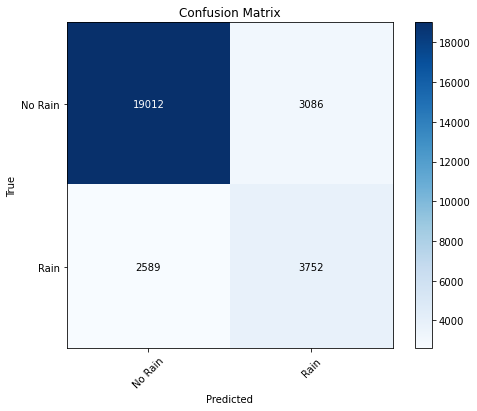

In [16]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Rain', 'Rain'], rotation=45)
plt.yticks(tick_marks, ['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

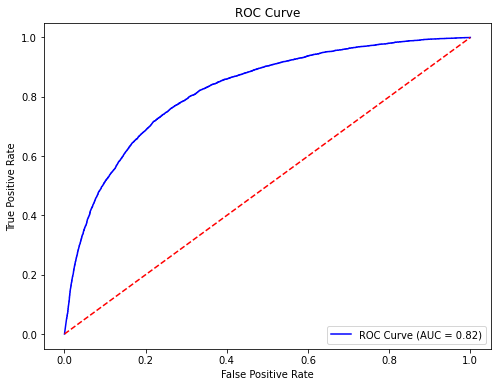

In [17]:
# Plot ROC Curve
y_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

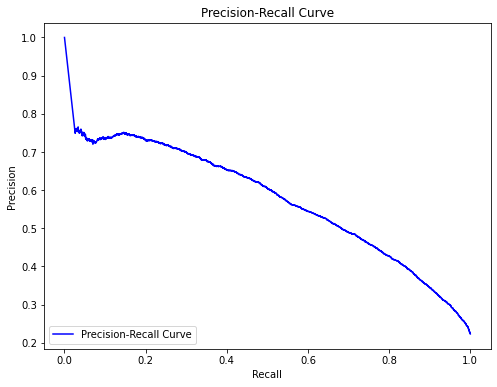

In [18]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()